0.22594882934663518 0.0366717603909273
0.221629893145827 0.03724830177017581
0.2214788974145898 0.03723839519759432
0.31114287113124395 0.049652973221836046
0.31164854379938317 0.049199995310669445
0.3119128484782137 0.049414733963488056
0.4272470332749963 0.05780167903704831
0.42777549995159814 0.05792145697928051
0.4281350838932681 0.05827288452772868


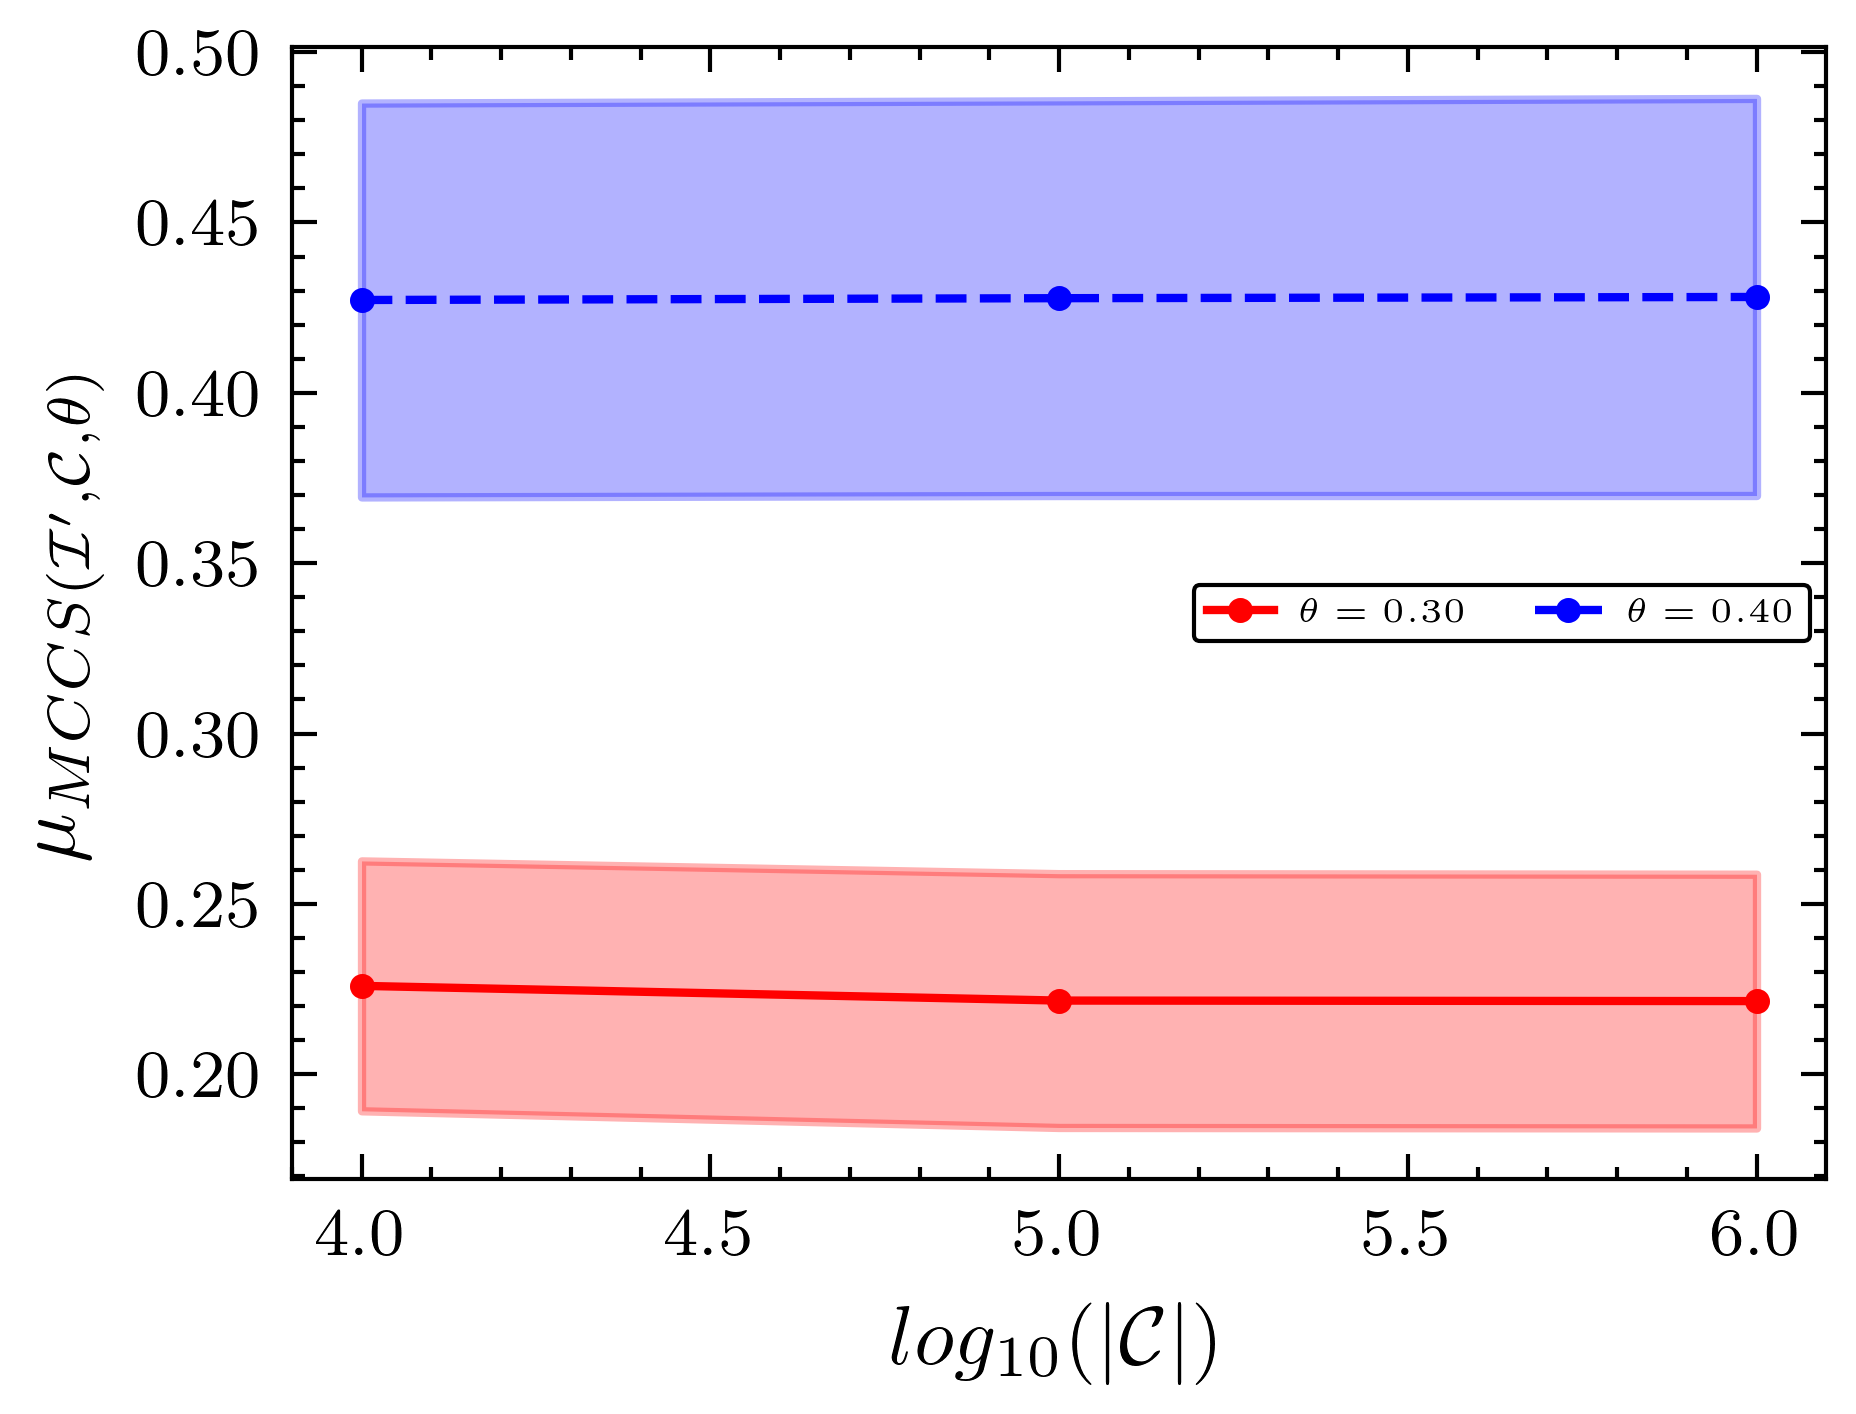

In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:

import random
import re
import matplotlib.pyplot as plt
from math import log10
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

plt.style.use([ '/Users/wuzhenyu/.matplotlib/stylelib/science.mplstyle' , '/Users/wuzhenyu/.matplotlib/stylelib/ieee.mplstyle' ])

regex = re.compile(r"(\d+):\d+:\s+\d+\.\d+:(\d+\.?(\d+)?)")


# In[2]:


def read_from_txt(txt):
    mccs_lst = []
    budget_acc_lst = []
    step = 0
    with open(txt) as fp:
        for line in fp:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                mccs_lst.append(float(r.group(2)))
    return mccs_lst


mccs_lst_dct = defaultdict(list)

#theta_lst = [0.2,0.25,0.3,0.35,0.4,0.45,0.5]
theta_lst = [0.3,0.35,0.4]
N_lst = [1,10,100]
for theta in theta_lst:
    for N in N_lst:
        mccs_lst1 = read_from_txt('monte_carlo_sampling_1/monte_carlo_sampling_anchors_{}_{}.txt'.format(N, theta))
        mccs_lst2 = read_from_txt('monte_carlo_sampling_2/monte_carlo_sampling_anchors_{}_{}.txt'.format(N, theta))
        mccs_lst3 = read_from_txt('monte_carlo_sampling_3/monte_carlo_sampling_anchors_{}_{}.txt'.format(N, theta))
        mccs_lst4 = read_from_txt('monte_carlo_sampling_4/monte_carlo_sampling_anchors_{}_{}.txt'.format(N, theta))
        mccs_lst = mccs_lst1+mccs_lst2+mccs_lst3+mccs_lst4
        mccs_lst_dct['{}_{}'.format(theta, N)] = mccs_lst
        print(np.mean(mccs_lst), np.std(mccs_lst))
    print('=======================================')

mccs_mean_lst_theta0, mccs_mean_lst_theta1, mccs_mean_lst_theta2 = [], [], []
mccs_std_lst_theta0, mccs_std_lst_theta1, mccs_std_lst_theta2 = [], [], []

for N in N_lst:
    mccs_lst = mccs_lst_dct['{}_{}'.format(0.3, N)]
    mccs_mean_lst_theta0.append(np.mean(mccs_lst))
    mccs_std_lst_theta0.append(np.std(mccs_lst))
    mccs_lst = mccs_lst_dct['{}_{}'.format(0.35, N)]
    mccs_mean_lst_theta1.append(np.mean(mccs_lst))
    mccs_std_lst_theta1.append(np.std(mccs_lst))
    mccs_lst = mccs_lst_dct['{}_{}'.format(0.4, N)]
    mccs_mean_lst_theta2.append(np.mean(mccs_lst))
    mccs_std_lst_theta2.append(np.std(mccs_lst))


logN_lst = [log10(N*10000) for N in N_lst]


def errorfill(x, y, yerr, color, marker, markersize, label, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()

    assert len(yerr) == len(y)
    ymin = [x - y for x, y in zip(y, yerr)]
    ymax = [x + y for x, y in zip(y, yerr)]

    ax.plot(x, y, color=color, marker=marker, markersize=markersize, label=label)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

errorfill(logN_lst, mccs_mean_lst_theta0, mccs_std_lst_theta0, color='r', marker='.', markersize=4, label=r'${{\theta=0.30}}$')
# errorfill(logN_lst, mccs_mean_lst_theta1, mccs_std_lst_theta1, color='b', marker='.', markersize=4, label=r'${{\theta=0.35}}$')
errorfill(logN_lst, mccs_mean_lst_theta2, mccs_std_lst_theta2, color='b', marker='.', markersize=4, label=r'${{\theta=0.40}}$')

# plt.errorbar(logN_lst, mccs_mean_lst_theta0, mccs_std_lst_theta0, color='r', marker='.', markersize=4, label=r'${{\theta=0.30}}$')
# plt.errorbar(logN_lst, mccs_mean_lst_theta1, mccs_std_lst_theta1, color='b', marker='.', markersize=4, label=r'${{\theta=0.35}}$')
# plt.errorbar(logN_lst, mccs_mean_lst_theta2, mccs_std_lst_theta2, color='k', marker='.', markersize=4, label=r'${{\theta=0.40}}$')

leg=plt.legend(loc='center right', ncol=len(theta_lst), shadow=False, framealpha=1, frameon=True, prop={'size': 4})
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
plt.xlabel(r'$log_{10}(|\mathcal{C}|)$',fontsize=10)
plt.ylabel(r'$\mu_{MCCS(\mathcal{I}^\prime,\mathcal{C}, \theta)}$', fontsize=10)
plt.savefig('MCCS_population_C.pdf', bbox_inches='tight', dpi=800, pad_inches=0)
plt.show()
plt.close()

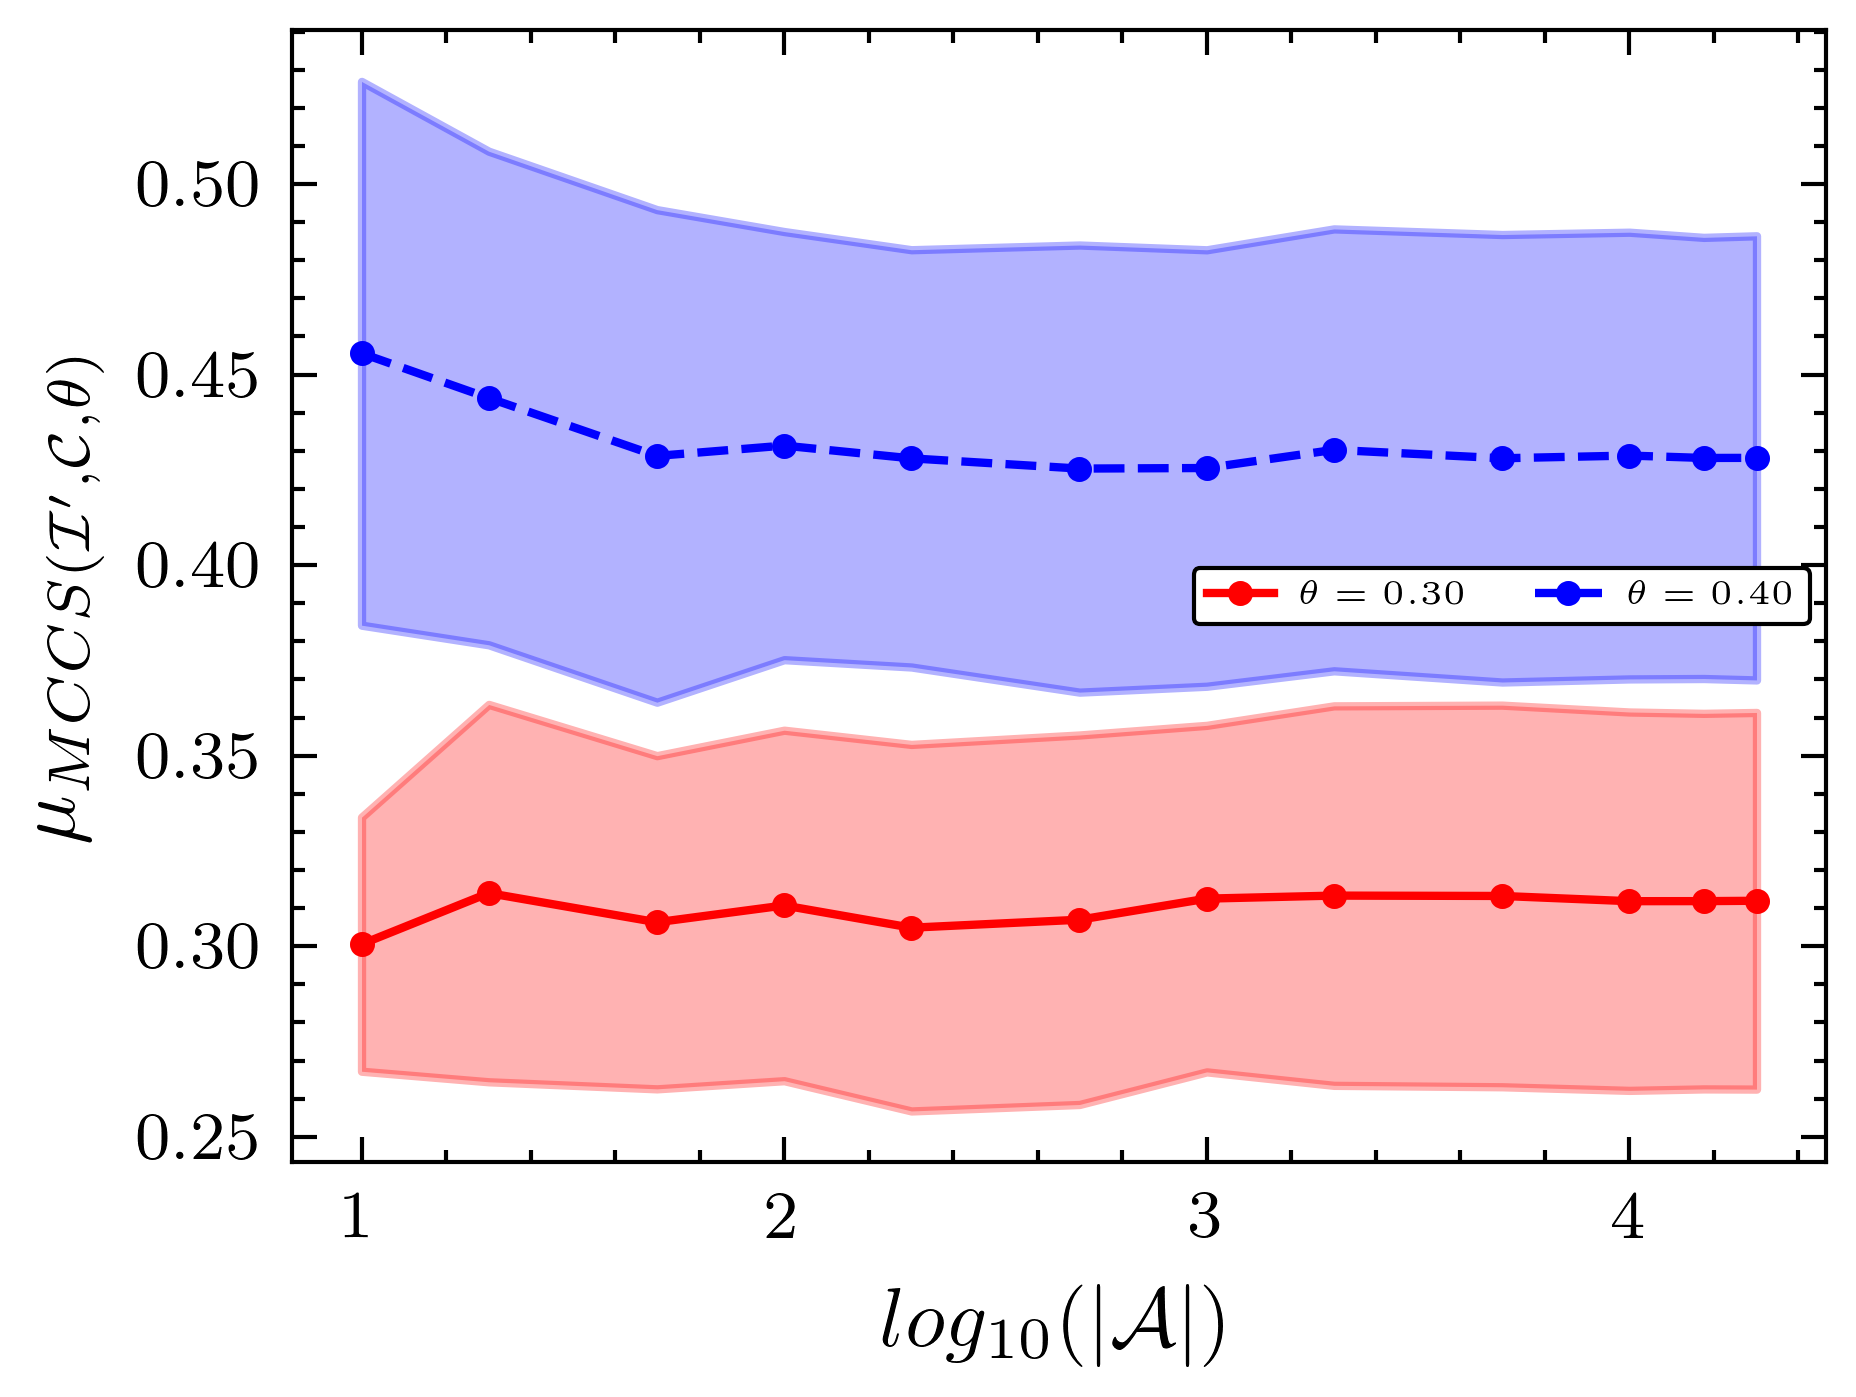

In [6]:
N = 100
mccs_lst_theta1 = mccs_lst_dct['{}_{}'.format(0.35, N)]
mccs_lst_theta2 = mccs_lst_dct['{}_{}'.format(0.4, N)]


mccs_mean_lst_theta1, mccs_mean_lst_theta2 = [], []
mccs_std_lst_theta1, mccs_std_lst_theta2 = [], []

C_lst=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000]
for C in C_lst:
    mccs_mean_lst_theta1.append(np.mean(random.sample(mccs_lst_theta1, C)))
    mccs_std_lst_theta1.append(np.std(random.sample(mccs_lst_theta1, C)))
    mccs_mean_lst_theta2.append(np.mean(random.sample(mccs_lst_theta2, C)))
    mccs_std_lst_theta2.append(np.std(random.sample(mccs_lst_theta2, C)))


logC_lst = [log10(C) for C in C_lst]


errorfill(logC_lst, mccs_mean_lst_theta1, mccs_std_lst_theta1, color='r', marker='.', markersize=4, label=r'${{\theta=0.30}}$')
# errorfill(logN_lst, mccs_mean_lst_theta1, mccs_std_lst_theta1, color='b', marker='.', markersize=4, label=r'${{\theta=0.35}}$')
errorfill(logC_lst, mccs_mean_lst_theta2, mccs_std_lst_theta2, color='b', marker='.', markersize=4, label=r'${{\theta=0.40}}$')

leg=plt.legend(loc='center right', ncol=len(theta_lst), shadow=False, framealpha=1, frameon=True, prop={'size': 4})
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
plt.xlabel(r'$log_{10}(|\mathcal{A}|)$',fontsize=10)
plt.ylabel(r'$\mu_{MCCS(\mathcal{I}^\prime,\mathcal{C}, \theta)}$', fontsize=10)
plt.savefig('MCCS_population_A.pdf', bbox_inches='tight', dpi=800, pad_inches=0)
plt.show()
plt.close()